# **Data Handling on Multi-omics Gleason Score Dataset (Mergefile_top20(4).csv)**

**Importing necessary libraries and checking the availability of the GPU**

In [1]:
import tensorflow as tf

2024-10-01 18:46:09.889592: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-01 18:46:09.910533: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-01 18:46:09.910552: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-01 18:46:09.910568: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-01 18:46:09.915229: I tensorflow/core/platform/cpu_feature_g

In [2]:
import numpy as np
print(np.__version__)

1.26.4


In [3]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-10-01 18:46:10.840340: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-01 18:46:10.856324: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-01 18:46:10.856419: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

**Loading in the CSV file using Pandas**

In [5]:
#Multi_omics dataset
df1 = pd.read_csv(r'/home/sanven0212/PycharmProjects/MultiOmicsFYP/Mergefile_top20 (4).csv')
df1.head(10)

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,PATIENT_ID,TUMOR_STAGE
0,0.489097,0.749514,0.703490,0.187461,0.297315,0.744052,0.677605,0.736915,0.165418,0.927902,...,0.309464,0.717767,0.075158,0.395376,0.900153,0.228063,0.592166,0.815008,TCGA-2A-A8VT,45
1,0.373498,0.790415,0.648564,0.367439,0.000000,0.638505,0.156215,0.673907,0.384063,0.807230,...,0.000000,0.791218,0.045264,0.090997,0.942279,0.257308,0.093755,0.762329,TCGA-2A-A8W1,43
2,0.316560,0.714836,0.794977,0.363893,0.523422,0.659055,0.609083,0.759267,0.107208,0.827580,...,0.493194,0.782551,0.086650,0.638757,0.923586,0.210818,0.472227,0.883677,TCGA-2A-A8W3,45
3,0.433556,0.637116,0.777338,0.559615,0.476760,0.623626,0.415425,0.539748,0.466929,0.599673,...,0.085465,0.569465,0.047191,0.101831,0.930270,0.221800,0.257343,1.000000,TCGA-2A-AAYF,34
4,0.363634,0.624428,0.892508,0.501788,0.472260,0.465397,0.619784,0.562305,0.450817,0.729161,...,0.119817,0.907230,0.082071,0.155321,0.901625,0.171257,0.201274,0.695265,TCGA-CH-5737,43
5,0.540453,0.630588,0.671140,0.275536,0.662487,0.476065,0.577890,0.824079,0.297729,0.899286,...,0.230212,0.831449,0.040868,0.266358,0.943859,0.178990,0.505571,0.831493,TCGA-CH-5739,34
6,0.506989,0.590670,0.727922,0.255442,0.733651,0.691024,0.398213,0.644989,0.383090,0.713497,...,0.502728,0.836422,0.036482,0.328812,0.954992,0.185582,0.391752,0.892649,TCGA-CH-5740,34
7,0.602648,0.780246,0.681841,0.362920,0.356234,0.631882,0.189198,0.589256,0.521341,0.691657,...,0.267739,0.839557,0.314925,0.271794,0.858322,0.119971,0.345410,0.831250,TCGA-CH-5741,45
8,0.476160,0.319457,0.926185,0.172214,0.711358,0.589873,0.692148,0.797628,0.445715,0.904204,...,0.711538,0.562896,0.024710,0.636648,0.786474,0.227947,0.863551,0.622275,TCGA-CH-5743,34
9,0.418700,0.702095,0.745375,0.430890,0.487548,0.669876,0.441037,0.506928,0.140151,0.867808,...,0.299419,0.605663,0.045999,0.422079,0.885389,0.238896,0.548180,0.828444,TCGA-CH-5744,43


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GE_SPOP      341 non-null    float64
 1   GE_FOXA1     341 non-null    float64
 2   GE_CTNNB1    341 non-null    float64
 3   GE_CLPTM1L   341 non-null    float64
 4   GE_DPYSL2    341 non-null    float64
 5   GE_NEIL1     341 non-null    float64
 6   GE_PITPNM2   341 non-null    float64
 7   GE_ATM       341 non-null    float64
 8   GE_EMG1      341 non-null    float64
 9   GE_ETV3      341 non-null    float64
 10  GE_BRAF      341 non-null    float64
 11  GE_NKX3-1    341 non-null    float64
 12  GE_ZMYM3     341 non-null    float64
 13  GE_SALL1     341 non-null    float64
 14  CNA_SPOP     341 non-null    float64
 15  CNA_TP53     341 non-null    float64
 16  CNA_FOXA1    341 non-null    float64
 17  CNA_CTNNB1   341 non-null    float64
 18  CNA_MED12    341 non-null    float64
 19  CNA_CLPT

**Checking the distribution of samples that are only present in 3 + 4 and 4 + 3 Gleason score classes**

In [7]:
#Checking the no of samples beloning to tumor stage (Gleason Score): 3 + 4 and 4 + 3
print(f"No of samples having a Gleason score of 3 + 4: {(df1['TUMOR_STAGE'] == 34).value_counts()}")
print(f"No of samples having a Gleason score of 4 + 3: {(df1['TUMOR_STAGE'] == 43).value_counts()}")

No of samples having a Gleason score of 3 + 4: TUMOR_STAGE
False    196
True     145
Name: count, dtype: int64
No of samples having a Gleason score of 4 + 3: TUMOR_STAGE
False    242
True      99
Name: count, dtype: int64


**Note: From the above output it is evident that there is a class imbalance between 3 + 4 (145) and 4 + 3 classes (99.)**

In [8]:
df1.shape # Out of 341 total samples 3 + 4 and 4 + 3 Gleason score samples account for 244 samples

(341, 48)

**PatientID feature is dropped since it doesn't have any impact on the gleason score or any of the other Omics**

In [9]:
#Dropping the patient ID column
df1.drop(['PATIENT_ID'], axis = 1, inplace = True)

**Reducing the gleason dataset to only have samples belonging to 3 + 4 and 4 + 3 classes**

In [10]:
df1_gleason = df1[(df1['TUMOR_STAGE'] == 34) | (df1['TUMOR_STAGE'] == 43)]
df1_gleason.shape

(244, 47)

**Converting the gleason scores from an int to an object to avoid bias**

In [12]:
df1_gleason['TUMOR_STAGE'] = df1_gleason['TUMOR_STAGE'].astype(object)

/tmp/ipykernel_2081367/1460778627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_gleason['TUMOR_STAGE'] = df1_gleason['TUMOR_STAGE'].astype(object)


In [15]:
df1_gleason.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 320
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GE_SPOP      244 non-null    float64
 1   GE_FOXA1     244 non-null    float64
 2   GE_CTNNB1    244 non-null    float64
 3   GE_CLPTM1L   244 non-null    float64
 4   GE_DPYSL2    244 non-null    float64
 5   GE_NEIL1     244 non-null    float64
 6   GE_PITPNM2   244 non-null    float64
 7   GE_ATM       244 non-null    float64
 8   GE_EMG1      244 non-null    float64
 9   GE_ETV3      244 non-null    float64
 10  GE_BRAF      244 non-null    float64
 11  GE_NKX3-1    244 non-null    float64
 12  GE_ZMYM3     244 non-null    float64
 13  GE_SALL1     244 non-null    float64
 14  CNA_SPOP     244 non-null    float64
 15  CNA_TP53     244 non-null    float64
 16  CNA_FOXA1    244 non-null    float64
 17  CNA_CTNNB1   244 non-null    float64
 18  CNA_MED12    244 non-null    float64
 19  CNA_CLPTM1L  

**Using a custom function to encode 3 + 4 (Majority) class to 0 and 4 + 3 (Minority) to 1**

In [17]:
#Encoding 34 (majority class) as 0 and 43 (minority class) as 1
def label_encode(target):
    if target == 34:
        target = 0
    else:
        target = 1
    return target
        
df1_gleason['TUMOR_STAGE'] = df1_gleason['TUMOR_STAGE'].apply(label_encode)

/tmp/ipykernel_2081367/2632578046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_gleason['TUMOR_STAGE'] = df1_gleason['TUMOR_STAGE'].apply(label_encode)


In [18]:
df1_gleason['TUMOR_STAGE'].value_counts()

TUMOR_STAGE
0    145
1     99
Name: count, dtype: int64

# **Handling Class Imbalance using GANs**
**Working of GANs**
1. 2 main components: Generator & Discriminator
2. Generator generates synthetic samples; Discriminator evaluates and checks the validity of the samples to check if they are fake or do they actually belong to the original dataset
3. Both of these networks are trained in tandem in a process called `adversarial training`

**Training steps**
1. Divide the entire dataset into majority and minority class samples
2. The majority class samples data is fed to the discriminator network as real data
3. Generator network takes in random normal noise as input which has the input and output shape of the minority class dataset
4. The Discriminator network takes in either minority class samples or synthetic samples generated by the generator to classify as real or fake
5. Discriminator is trained on real minority samples and generated samples

**Note: While Generator is being trained, the discriminator has to be frozen and vice-versa. In addition the input and output_dim for discriminator should match the no of columns in the dataframe and the target feature must be excluded**

**Splitting the gleason dataset into majority and minority class samples**

In [19]:
#Getting the majority and minority datasets
majority_dataset = df1_gleason[df1_gleason['TUMOR_STAGE'] == 0].drop(['TUMOR_STAGE'], axis = 1)
minority_dataset = df1_gleason[df1_gleason['TUMOR_STAGE'] == 1].drop(['TUMOR_STAGE'], axis = 1)

In [20]:
majority_dataset

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_DPYSL2,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1
3,0.433556,0.637116,0.777338,0.559615,0.476760,0.623626,0.415425,0.539748,0.466929,0.599673,...,0.799996,0.111825,0.085465,0.569465,0.047191,0.101831,0.930270,0.221800,0.257343,1.000000
5,0.540453,0.630588,0.671140,0.275536,0.662487,0.476065,0.577890,0.824079,0.297729,0.899286,...,0.785736,0.228759,0.230212,0.831449,0.040868,0.266358,0.943859,0.178990,0.505571,0.831493
6,0.506989,0.590670,0.727922,0.255442,0.733651,0.691024,0.398213,0.644989,0.383090,0.713497,...,0.887808,0.129223,0.502728,0.836422,0.036482,0.328812,0.954992,0.185582,0.391752,0.892649
8,0.476160,0.319457,0.926185,0.172214,0.711358,0.589873,0.692148,0.797628,0.445715,0.904204,...,0.824405,0.256412,0.711538,0.562896,0.024710,0.636648,0.786474,0.227947,0.863551,0.622275
10,0.503070,0.628456,0.872354,0.317441,0.428327,0.641957,0.624830,0.775454,0.426589,0.880784,...,0.868720,0.153859,0.391933,0.866063,0.027305,0.472842,0.917519,0.216519,0.427699,0.835883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.227620,0.672938,0.530553,0.381428,0.175972,0.824114,0.690394,0.603873,0.581930,0.815111,...,0.961014,0.007223,0.288589,0.872192,0.069334,0.125432,0.929922,0.232844,0.000000,0.942248
297,0.258006,0.687300,0.757727,0.470806,0.394668,0.575239,0.302726,0.603989,0.098050,0.789135,...,0.921992,0.118404,0.060399,0.655711,0.097734,0.271404,0.947257,0.292598,0.266765,0.856432
299,0.485115,0.338921,0.309483,0.128955,0.510424,0.891032,0.612340,0.569947,0.697590,0.351627,...,0.838034,0.188277,0.416333,0.627777,0.085632,0.461510,0.930563,0.284727,0.549605,0.696472
301,0.624653,0.623661,0.434110,0.445462,0.492410,0.912847,0.351620,0.441806,0.503556,0.462003,...,0.848265,0.112395,0.178172,0.669154,0.097933,0.662839,0.963417,0.212591,0.444958,0.955913


In [21]:
minority_dataset

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_DPYSL2,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1
1,0.373498,0.790415,0.648564,0.367439,0.000000,0.638505,0.156215,0.673907,0.384063,0.807230,...,0.968367,0.034757,0.000000,0.791218,0.045264,0.090997,0.942279,0.257308,0.093755,0.762329
4,0.363634,0.624428,0.892508,0.501788,0.472260,0.465397,0.619784,0.562305,0.450817,0.729161,...,0.863236,0.182983,0.119817,0.907230,0.082071,0.155321,0.901625,0.171257,0.201274,0.695265
9,0.418700,0.702095,0.745375,0.430890,0.487548,0.669876,0.441037,0.506928,0.140151,0.867808,...,0.784092,0.181650,0.299419,0.605663,0.045999,0.422079,0.885389,0.238896,0.548180,0.828444
11,0.470982,0.654804,0.799236,0.414669,0.421094,0.578125,0.466010,0.715588,0.355391,0.813532,...,0.850998,0.172506,0.200640,0.782428,0.035299,0.285695,0.933832,0.175760,0.263804,0.776006
15,0.535495,0.574125,0.990674,0.227795,0.686890,0.486809,0.735071,0.832965,0.387468,0.947819,...,0.687718,0.330505,0.531055,0.546693,0.048915,0.458723,0.868237,0.251513,0.654329,0.667877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.678217,0.379478,0.651014,0.313037,0.727314,0.697200,0.609731,0.463844,0.473988,0.731562,...,0.849849,0.155282,0.363361,0.564151,0.044499,0.272052,0.953258,0.111529,0.416038,0.811600
308,0.570659,0.513166,0.756434,0.326435,0.636893,0.703464,0.657117,0.559125,0.441622,0.738266,...,0.811347,0.149038,0.445528,0.621179,0.045135,0.693765,0.926586,0.133146,0.672396,0.737615
309,0.405538,0.608860,0.570281,0.589831,0.408323,0.720283,0.288630,0.456215,0.602279,0.361531,...,0.861432,0.155776,0.039771,0.750137,0.054077,0.262873,0.958069,0.289268,0.356099,0.469004
315,0.372651,0.261140,0.643123,0.389611,0.907982,0.579044,0.608729,0.577335,0.446111,0.763712,...,0.832840,0.641021,0.367391,0.477116,0.079954,0.354398,0.883972,0.342184,0.509671,0.810917


**Generator Network**

In [22]:
#Generator
from tensorflow.keras.layers import Dense, Input, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
input_dim = 100
output_dim = minority_dataset.shape[1]
gen_input = Input(shape = (input_dim, ))
fc_1 = Dense(128)(gen_input)
lr_1 = LeakyReLU(alpha = 0.2)(fc_1)
bn_1 = BatchNormalization(momentum = 0.8)(lr_1)
fc_2 = Dense(256)(bn_1)
lr_2 = LeakyReLU(alpha = 0.2)(fc_2)
bn_2 = BatchNormalization(momentum = 0.8)(lr_2)
fc_3 = Dense(512)(bn_2)
lr_3 = LeakyReLU(alpha = 0.2)(fc_3)
bn_3 = BatchNormalization(momentum = 0.8)(lr_3)
gen_output = Dense(output_dim, activation = 'sigmoid')(bn_3)
gen_model = Model(gen_input, gen_output)
gen_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                             

2024-10-01 18:46:12.039580: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-01 18:46:12.039748: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-01 18:46:12.039807: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

**Discriminator Network**

In [23]:
#Discriminator
dis_input = Input(shape = (output_dim, ))
dis_fc_1 = Dense(512)(dis_input)
dis_lr_1 = LeakyReLU(alpha = 0.2)(dis_fc_1)
dis_dp_1 = Dropout(0.4)(dis_lr_1)
dis_fc_2 = Dense(512)(dis_dp_1)
dis_lr_2 = LeakyReLU(alpha = 0.2)(dis_fc_2)
dis_dp_2 = Dropout(0.4)(dis_lr_2)
dis_fc_3 = Dense(256)(dis_dp_2)
dis_lr_3 = LeakyReLU(alpha = 0.2)(dis_fc_3)
dis_dp_3 = Dropout(0.4)(dis_lr_3)
dis_output = Dense(1, activation = 'sigmoid')(dis_dp_3)
dis_model = Model(dis_input, dis_output)

dis_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense_4 (Dense)             (None, 512)               24064     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0   

In [24]:
#Compiling the discriminator
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
dis_model.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

**GAN Model**

In [25]:
#GAN Model
dis_model.trainable = False
#Creating a latent vector layer
latent_layer = Input(shape = (input_dim,))
#Generated sample
gen_sample = gen_model(latent_layer)
#Forward Pass into discriminant
dis_fp = dis_model(gen_sample)
GAN_model = Model(latent_layer, dis_fp)
GAN_model.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001))

In [26]:
GAN_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 model (Functional)          (None, 46)                204718    
                                                                 
 model_1 (Functional)        (None, 1)                 418305    
                                                                 
Total params: 623023 (2.38 MB)
Trainable params: 202926 (792.68 KB)
Non-trainable params: 420097 (1.60 MB)
_________________________________________________________________


**Training Loop**

In [27]:
tf.random.set_seed(42)
batch_size = 32
epochs = 1000
from tqdm.auto import tqdm
#Training phase for GAN
for i in tqdm(range(epochs)):
    #Getting a batch of samples from minority class
    real_minority_samples = tf.convert_to_tensor(minority_dataset.sample(batch_size).values)
    #Fake samples by forward pass of generator
    random_latent_vector = tf.random.normal((batch_size, input_dim))
    fake_minority_samples = gen_model(random_latent_vector)
    #Creating tensors of 1s and 0s for True and Fake samples respectively
    real_sample_labels = tf.ones(batch_size, 1)
    fake_sample_labels = tf.zeros(batch_size, 1)
    #Training Discriminator
    dis_real_loss = dis_model.train_on_batch(real_minority_samples, real_sample_labels)
    dis_fake_loss = dis_model.train_on_batch(fake_minority_samples, fake_sample_labels)
    
    #Training Generator
    gen_latent_vector = tf.random.normal((batch_size, input_dim))
    gen_label = tf.ones((batch_size, 1))
    
    GAN_loss = GAN_model.train_on_batch(gen_latent_vector, gen_label)
    print(f'Epoch: {i + 1} | Discriminator Real Loss: {dis_real_loss} | Discriminator Fake Loss: {dis_fake_loss} | GAN_Loss: {GAN_loss}')

  0%|          | 0/1000 [00:00<?, ?it/s]

2024-10-01 18:46:12.502106: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-01 18:46:13.463827: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7d78ac44fe90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-01 18:46:13.463844: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-10-01 18:46:13.466437: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-01 18:46:13.473866: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2024-10-01 18:46:13.526132: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch: 1 | Discriminator Real Loss: [0.929472804069519, 0.09375] | Discriminator Fake Loss: [1.1452064514160156, 0.0] | GAN_Loss: 0.46662989258766174
Epoch: 2 | Discriminator Real Loss: [0.3952910304069519, 1.0] | Discriminator Fake Loss: [1.0459357500076294, 0.0] | GAN_Loss: 0.5179858803749084
Epoch: 3 | Discriminator Real Loss: [0.3981388807296753, 1.0] | Discriminator Fake Loss: [0.8336026072502136, 0.03125] | GAN_Loss: 0.6533783674240112
Epoch: 4 | Discriminator Real Loss: [0.44573119282722473, 1.0] | Discriminator Fake Loss: [0.7134455442428589, 0.375] | GAN_Loss: 0.7652132511138916
Epoch: 5 | Discriminator Real Loss: [0.4555297791957855, 1.0] | Discriminator Fake Loss: [0.6134452819824219, 0.84375] | GAN_Loss: 0.8920823931694031
Epoch: 6 | Discriminator Real Loss: [0.4237830638885498, 0.96875] | Discriminator Fake Loss: [0.5263268947601318, 0.9375] | GAN_Loss: 0.9927768111228943
Epoch: 7 | Discriminator Real Loss: [0.4303426444530487, 1.0] | Discriminator Fake Loss: [0.4538546204

**Generating 46 synthetic samples to make sure both the classes have the same 145 classes**

In [28]:
#Now generating synthetic samples
#Majority class 0 has 145 samples while minority class has 99 samples
#46 samples have to be generated
tf.random.set_seed(42)
num_samples = 46
noise_vec = tf.random.normal((num_samples, input_dim))
synth_min_samples = gen_model.predict(noise_vec)

synth_min_df = pd.DataFrame(synth_min_samples, columns = minority_dataset.columns)
synth_min_df['TUMOR_STAGE'] = 1

2/2 [==============================] - 0s 4ms/step


In [29]:
synth_min_df

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
0,0.237651,0.729190,0.605940,0.679013,0.451559,0.831169,0.325828,0.213020,0.603134,0.222720,...,0.148673,0.192801,0.825429,0.050491,0.310266,0.977595,0.230127,0.581230,0.804154,1
1,0.369828,0.930027,0.800286,0.798110,0.131688,0.677325,0.204672,0.720663,0.176141,0.793106,...,0.056811,0.035842,0.901164,0.038393,0.161979,0.969544,0.071375,0.195901,0.966575,1
2,0.308023,0.429953,0.721172,0.357352,0.854355,0.366576,0.640218,0.522044,0.555432,0.724144,...,0.469516,0.646849,0.522713,0.059618,0.368588,0.934507,0.193555,0.403459,0.640048,1
3,0.347061,0.700261,0.743680,0.679450,0.525843,0.636494,0.436951,0.270847,0.871431,0.292237,...,0.426665,0.185127,0.947163,0.016217,0.197161,0.973220,0.187290,0.229531,0.790565,1
4,0.379348,0.485735,0.902474,0.301700,0.758239,0.409764,0.608064,0.865734,0.453437,0.915479,...,0.419119,0.454304,0.777617,0.050305,0.337532,0.971554,0.229113,0.700907,0.792750,1
5,0.565790,0.569892,0.707079,0.383006,0.587917,0.707839,0.521907,0.559898,0.365442,0.732810,...,0.242042,0.311391,0.489828,0.091670,0.547730,0.906325,0.278722,0.576741,0.843096,1
6,0.629074,0.651405,0.846473,0.486864,0.688865,0.547808,0.468479,0.738856,0.311282,0.838537,...,0.149459,0.255429,0.717460,0.042664,0.489715,0.967372,0.272900,0.543963,0.834492,1
7,0.396178,0.655764,0.741329,0.518046,0.294009,0.785328,0.229334,0.434012,0.475705,0.651981,...,0.220627,0.140574,0.842636,0.065218,0.322324,0.936576,0.219894,0.238557,0.795408,1
8,0.386981,0.582482,0.625047,0.629923,0.651290,0.848843,0.370622,0.543530,0.454566,0.398550,...,0.068059,0.287613,0.503656,0.042003,0.446778,0.961520,0.322456,0.674538,0.912000,1
9,0.421718,0.598622,0.631353,0.490685,0.685284,0.695042,0.515173,0.594262,0.538878,0.565192,...,0.196591,0.499814,0.411801,0.094280,0.540863,0.941313,0.302134,0.626628,0.810349,1


In [30]:
synth_min_df['TUMOR_STAGE'].value_counts()

TUMOR_STAGE
1    46
Name: count, dtype: int64

In [31]:
minority_dataset['TUMOR_STAGE'] = df1_gleason['TUMOR_STAGE']
minority_dataset.describe()

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0
mean,0.430408,0.549413,0.691829,0.422083,0.575401,0.621343,0.511619,0.526449,0.470264,0.640008,...,0.242277,0.365601,0.655664,0.078446,0.398783,0.920510,0.245047,0.476970,0.779241,1.0
std,0.123333,0.125945,0.172995,0.127049,0.170970,0.145871,0.175946,0.178469,0.163476,0.232612,...,0.132837,0.184294,0.139925,0.100675,0.152910,0.039621,0.094361,0.184920,0.126294,0.0
min,0.035294,0.186487,0.145150,0.104812,0.000000,0.295086,0.020762,0.091439,0.000000,0.012763,...,0.034757,0.000000,0.254443,0.000000,0.072432,0.763054,0.000000,0.011983,0.271312,1.0
25%,0.355857,0.491945,0.616651,0.348417,0.465805,0.526727,0.409490,0.417746,0.366516,0.465799,...,0.170191,0.223645,0.560492,0.042507,0.283923,0.901510,0.185615,0.351461,0.719657,1.0
50%,0.447820,0.572546,0.705212,0.414669,0.569090,0.630431,0.517199,0.553874,0.443815,0.718421,...,0.223858,0.359262,0.652253,0.060890,0.405276,0.926367,0.236818,0.493626,0.797874,1.0
75%,0.505466,0.629884,0.824139,0.504164,0.711534,0.708140,0.623376,0.648361,0.553523,0.814305,...,0.275514,0.495186,0.759650,0.081639,0.508039,0.949720,0.281463,0.612733,0.858918,1.0
max,0.760484,0.872697,0.990674,0.704124,0.907982,0.950996,0.829500,0.843633,0.878978,0.967994,...,1.000000,0.980276,0.915765,0.882551,0.757773,0.988591,0.541422,0.876869,0.983930,1.0


In [32]:
synth_min_df.describe()

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,0.398120,0.606804,0.758727,0.455497,0.595092,0.620059,0.481325,0.571389,0.483104,0.671904,...,0.272271,0.308870,0.695250,0.053124,0.372789,0.961706,0.249215,0.464114,0.807312,1.0
std,0.117838,0.120087,0.100026,0.138597,0.195017,0.179663,0.143731,0.173719,0.179598,0.225188,...,0.161605,0.150804,0.184342,0.031314,0.160383,0.022195,0.078609,0.195333,0.091047,0.0
min,0.162127,0.375571,0.483718,0.159423,0.131688,0.129798,0.163276,0.159466,0.176141,0.124104,...,0.056811,0.035842,0.335720,0.010446,0.018819,0.900525,0.054577,0.039426,0.579762,1.0
25%,0.312614,0.525204,0.703573,0.382007,0.456455,0.558260,0.381900,0.477598,0.363296,0.563432,...,0.145802,0.192241,0.542364,0.033575,0.293145,0.948859,0.195577,0.297674,0.764205,1.0
50%,0.378517,0.599640,0.779903,0.452456,0.615800,0.656311,0.469414,0.560034,0.479812,0.710746,...,0.245058,0.302946,0.684021,0.047092,0.392669,0.967414,0.250214,0.510629,0.817301,1.0
75%,0.474953,0.655687,0.824287,0.539689,0.754676,0.733486,0.592536,0.715241,0.574774,0.871926,...,0.389929,0.364690,0.868986,0.067902,0.481676,0.976333,0.297712,0.630790,0.872896,1.0
max,0.666762,0.930027,0.902474,0.798110,0.966694,0.848843,0.759205,0.883766,0.918111,0.950680,...,0.757911,0.786444,0.991440,0.160524,0.814319,0.995489,0.428746,0.802107,0.966575,1.0


**Using PCA to decompose the dataset into 2 principal components**

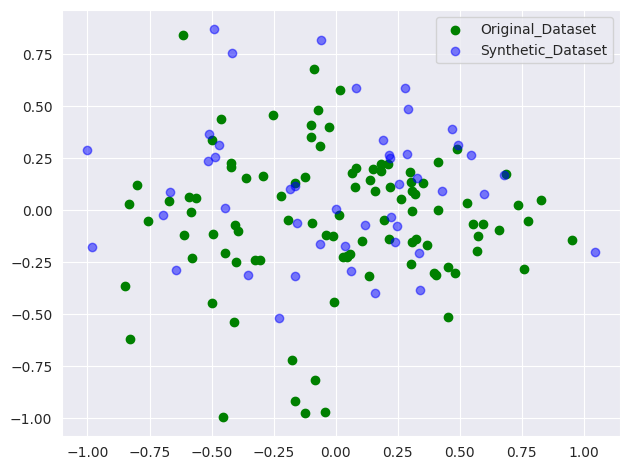

In [33]:
#Checking if synthetic samples generated are within the permissible values of the original dataset using Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
synth_values = synth_min_df.values
original_min_values = minority_dataset.values
#Vertically stacking the synthetic samples with the minority class samples
stacked_values = np.vstack([original_min_values, synth_values])
pca_values = pca.fit_transform(stacked_values)

#Plotting the values on a scatterplot
original_pca_values = pca_values[: len(original_min_values)]
synth_pca_values = pca_values[len(original_min_values): ]

plt.scatter(x = original_pca_values[:, 0], y = original_pca_values[:, 1], alpha = 1, c = 'g', label = 'Original_Dataset')
plt.scatter(x = synth_pca_values[:, 0], y = synth_pca_values[:, 1], alpha = 0.5, c = 'b', label = 'Synthetic_Dataset')
plt.legend()
plt.tight_layout()

**Concatenating the minority class samples with the synthetic samples to get 145 samples**

In [38]:
combined_min_df = pd.concat([minority_dataset, synth_min_df], axis = 0)

In [39]:
combined_min_df

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
1,0.373498,0.790415,0.648564,0.367439,0.000000,0.638505,0.156215,0.673907,0.384063,0.807230,...,0.034757,0.000000,0.791218,0.045264,0.090997,0.942279,0.257308,0.093755,0.762329,1
4,0.363634,0.624428,0.892508,0.501788,0.472260,0.465397,0.619784,0.562305,0.450817,0.729161,...,0.182983,0.119817,0.907230,0.082071,0.155321,0.901625,0.171257,0.201274,0.695265,1
9,0.418700,0.702095,0.745375,0.430890,0.487548,0.669876,0.441037,0.506928,0.140151,0.867808,...,0.181650,0.299419,0.605663,0.045999,0.422079,0.885389,0.238896,0.548180,0.828444,1
11,0.470982,0.654804,0.799236,0.414669,0.421094,0.578125,0.466010,0.715588,0.355391,0.813532,...,0.172506,0.200640,0.782428,0.035299,0.285695,0.933832,0.175760,0.263804,0.776006,1
15,0.535495,0.574125,0.990674,0.227795,0.686890,0.486809,0.735071,0.832965,0.387468,0.947819,...,0.330505,0.531055,0.546693,0.048915,0.458723,0.868237,0.251513,0.654329,0.667877,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0.405292,0.686501,0.796409,0.654468,0.423074,0.687883,0.381280,0.523034,0.299717,0.562845,...,0.122687,0.138823,0.626385,0.036901,0.436730,0.947897,0.161460,0.553129,0.887237,1
42,0.387901,0.607557,0.721091,0.439910,0.743987,0.718245,0.691398,0.545181,0.614593,0.522004,...,0.237433,0.341949,0.603533,0.098974,0.363759,0.937360,0.428746,0.502110,0.786136,1
43,0.269977,0.563076,0.882795,0.351648,0.261320,0.567126,0.321584,0.521886,0.620781,0.783342,...,0.541540,0.166126,0.959928,0.023770,0.082784,0.976976,0.171437,0.103002,0.763975,1
44,0.162127,0.533088,0.618783,0.534847,0.345407,0.753220,0.317351,0.203723,0.888112,0.280865,...,0.442454,0.192055,0.991440,0.016098,0.018819,0.995489,0.054577,0.039426,0.851792,1


**Finally combining the synthetic samples to the gleason dataset**

In [43]:
processed_gleason_df = pd.concat([df1_gleason, synth_min_df], axis = 0)
processed_gleason_df['TUMOR_STAGE'].value_counts()

TUMOR_STAGE
1    145
0    145
Name: count, dtype: int64

In [44]:
processed_gleason_df

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
1,0.373498,0.790415,0.648564,0.367439,0.000000,0.638505,0.156215,0.673907,0.384063,0.807230,...,0.034757,0.000000,0.791218,0.045264,0.090997,0.942279,0.257308,0.093755,0.762329,1
3,0.433556,0.637116,0.777338,0.559615,0.476760,0.623626,0.415425,0.539748,0.466929,0.599673,...,0.111825,0.085465,0.569465,0.047191,0.101831,0.930270,0.221800,0.257343,1.000000,0
4,0.363634,0.624428,0.892508,0.501788,0.472260,0.465397,0.619784,0.562305,0.450817,0.729161,...,0.182983,0.119817,0.907230,0.082071,0.155321,0.901625,0.171257,0.201274,0.695265,1
5,0.540453,0.630588,0.671140,0.275536,0.662487,0.476065,0.577890,0.824079,0.297729,0.899286,...,0.228759,0.230212,0.831449,0.040868,0.266358,0.943859,0.178990,0.505571,0.831493,0
6,0.506989,0.590670,0.727922,0.255442,0.733651,0.691024,0.398213,0.644989,0.383090,0.713497,...,0.129223,0.502728,0.836422,0.036482,0.328812,0.954992,0.185582,0.391752,0.892649,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0.405292,0.686501,0.796409,0.654468,0.423074,0.687883,0.381280,0.523034,0.299717,0.562845,...,0.122687,0.138823,0.626385,0.036901,0.436730,0.947897,0.161460,0.553129,0.887237,1
42,0.387901,0.607557,0.721091,0.439910,0.743987,0.718245,0.691398,0.545181,0.614593,0.522004,...,0.237433,0.341949,0.603533,0.098974,0.363759,0.937360,0.428746,0.502110,0.786136,1
43,0.269977,0.563076,0.882795,0.351648,0.261320,0.567126,0.321584,0.521886,0.620781,0.783342,...,0.541540,0.166126,0.959928,0.023770,0.082784,0.976976,0.171437,0.103002,0.763975,1
44,0.162127,0.533088,0.618783,0.534847,0.345407,0.753220,0.317351,0.203723,0.888112,0.280865,...,0.442454,0.192055,0.991440,0.016098,0.018819,0.995489,0.054577,0.039426,0.851792,1


**Shuffling the dataset to stop a neural network from capturing patterns associated with the order of the samples**

In [45]:
processed_gleason_df = processed_gleason_df.sample(frac = 1).reset_index(drop = True)
processed_gleason_df

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
0,0.575079,0.587133,0.922717,0.234906,0.748240,0.472291,0.554445,0.800431,0.209846,0.968074,...,0.211153,0.510356,0.759293,0.071506,0.387823,0.931180,0.163421,0.385668,0.866652,0
1,0.537323,0.651585,0.854902,0.292120,0.490203,0.545553,0.473597,0.775988,0.363620,0.821883,...,0.308363,1.000000,0.814994,0.033682,0.302847,0.922685,0.165114,0.386124,0.915704,0
2,0.386981,0.582482,0.625047,0.629923,0.651290,0.848843,0.370622,0.543530,0.454566,0.398550,...,0.068059,0.287613,0.503656,0.042003,0.446778,0.961520,0.322456,0.674538,0.912000,1
3,0.227620,0.672938,0.530553,0.381428,0.175972,0.824114,0.690394,0.603873,0.581930,0.815111,...,0.007223,0.288589,0.872192,0.069334,0.125432,0.929922,0.232844,0.000000,0.942248,0
4,0.391386,0.539218,0.905188,0.375629,0.809590,0.510654,0.483783,0.744336,0.323944,0.919157,...,0.300174,0.267242,0.539900,0.127723,0.409610,0.925696,0.192795,0.520819,0.866199,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.557279,0.668062,0.716778,0.461685,0.447715,0.665308,0.685921,0.623949,0.386367,0.769133,...,0.135824,0.344780,0.761523,0.105973,0.165160,0.901504,0.277806,0.284653,0.828625,0
286,0.654281,0.436268,0.704380,0.359377,0.698625,0.605353,0.908942,0.456691,0.472161,0.709531,...,0.263871,0.560218,0.649019,0.046348,0.612370,0.925217,0.223666,0.519095,0.723633,0
287,0.406139,0.429788,0.675112,0.392159,0.676224,0.620942,0.470348,0.442154,0.633134,0.586738,...,0.404938,0.333120,0.844538,0.068139,0.384597,0.980951,0.339410,0.266695,0.599212,1
288,0.605638,0.566355,0.847963,0.246558,0.776904,0.595867,0.545772,0.722747,0.337414,0.876418,...,0.267997,0.563866,0.544564,0.048979,0.530474,0.925479,0.190595,0.626709,0.718878,1


**Balanced gleason dataset**

In [47]:
processed_gleason_df['TUMOR_STAGE'].value_counts()

TUMOR_STAGE
0    145
1    145
Name: count, dtype: int64

**Saving the final dataframe as a .CSV file**

In [49]:
processed_gleason_df.to_csv('Balanced_Gleason_Score_Dataset.csv', index = False)